In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df_test = pd.read_csv("/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv")
df_train = pd.read_csv("/kaggle/input/energy-consumption-dataset-linear-regression/train_energy_data.csv")

In [217]:
df_test.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [218]:
df_test.head()
#as we see here the data format is the same

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [219]:
df = pd.merge(df_train,df_test,how="outer")

In [220]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Commercial,560,68,3,33.63,Weekend,2599.86
1,Commercial,605,16,36,16.95,Weekday,2875.48
2,Commercial,625,9,18,19.56,Weekday,2433.47
3,Commercial,781,4,34,22.51,Weekday,2696.49
4,Commercial,1161,81,11,15.45,Weekend,3010.81


In [221]:
df["Building Type"].unique()

array(['Commercial', 'Industrial', 'Residential'], dtype=object)

In [222]:

df["Day of Week"].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [223]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [224]:
df["Day of Week"] = df["Day of Week"].map({"Weekend":1,"Weekday":0})
df = pd.get_dummies(df,columns=["Building Type"],drop_first=True)

In [225]:
df.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,Building Type_Industrial,Building Type_Residential
0,560,68,3,33.63,1,2599.86,False,False
1,605,16,36,16.95,0,2875.48,False,False
2,625,9,18,19.56,0,2433.47,False,False
3,781,4,34,22.51,0,2696.49,False,False
4,1161,81,11,15.45,1,3010.81,False,False


In [226]:
df[["Building Type_Industrial","Building Type_Residential"]] = df[["Building Type_Industrial","Building Type_Residential"]].astype(int)

In [227]:
df.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,Building Type_Industrial,Building Type_Residential
0,560,68,3,33.63,1,2599.86,0,0
1,605,16,36,16.95,0,2875.48,0,0
2,625,9,18,19.56,0,2433.47,0,0
3,781,4,34,22.51,0,2696.49,0,0
4,1161,81,11,15.45,1,3010.81,0,0


<Axes: >

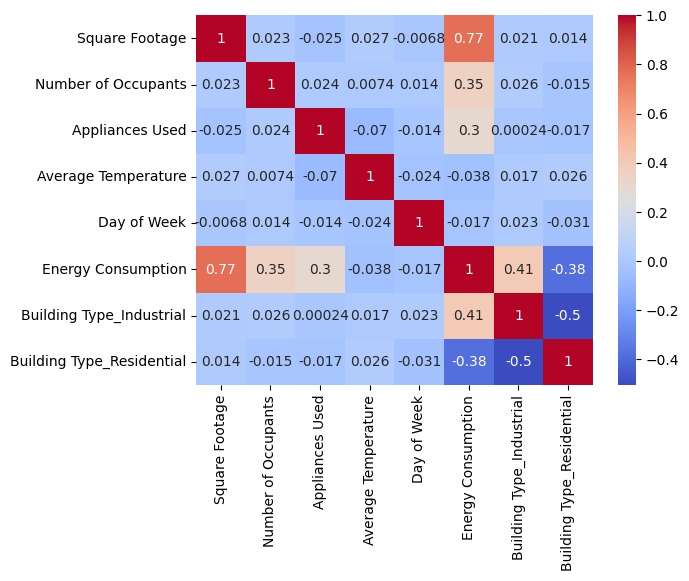

In [228]:
corr = df.corr()
sns.heatmap(corr,cmap="coolwarm",annot=True)

In [229]:
X=df.drop("Energy Consumption",axis=1)
y=df["Energy Consumption"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline

models={
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "LinearRegression":LinearRegression()
}

for name,model in models.items():
    pipeline=Pipeline([
        ("StandardScaler",StandardScaler()),
        ("Model",model)
    ])
    pipeline.fit(X_train,y_train)
    prediction = pipeline.predict(X_test)
    print(f"model: {model}")
    print(f"r2_score : {r2_score(y_test,prediction)}")
    print(f"mae : {mean_absolute_error(y_test,prediction)}")
    print(f"mse : {mean_squared_error(y_test,prediction)}\n")

model: Lasso()
r2_score : 0.9999925074689134
mae : 2.0064326015874774
mse : 6.019652836464917

model: Ridge()
r2_score : 0.9999988959036572
mae : 0.7895773752090421
mse : 0.8870536011061123

model: ElasticNet()
r2_score : 0.9015364585676916
mae : 235.4757916382506
mse : 79107.62459600973

model: LinearRegression()
r2_score : 0.9999999997622699
mae : 0.011725767969691828
mse : 0.000190997170330279

